In [72]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [73]:
data=pd.read_excel('./data/语义训练Test.xlsx')
data.columns=data.iloc[0,:]
data=data.iloc[1:,:]

In [74]:
num=20

# 构建字典

In [75]:
k = 3
dic_out={'P': 0, 'S': 1, 'E': 2}
for i in set(np.squeeze(data.iloc[:num,0:3].values.reshape((1,-1)),0)):
    if pd.isna(i):
        pass
    else:
        dic_out[i]=k
        k+=1
np.save('./data/dic_out.npy',dic_out)

In [76]:
dic_out=np.load('./data/dic_out.npy',allow_pickle=True).tolist()

In [77]:
words = []
for item in data.iloc[:num,3]:
    t = 0
    while t < len(item):
        words.append(item[t])
        t+=1

In [78]:
k = 3
dic_in={'P': 0, 'S': 1, 'E': 2}
for i in set(words):
    if pd.isna(i) or i==' ' or i=='':
        pass
    else:
        dic_in[i]=k
        k+=1
np.save('./data/dic_in.npy',dic_in)

In [79]:
dic_in=np.load('./data/dic_in.npy',allow_pickle=True).tolist()

In [80]:
p=0
for k in dic_in.keys():
    p+=1
print(p)

74


# 处理input output数据
## in长度<=3， out长度<=110
## sentence: [[input,encode,output],[input,encode,output]...]

In [81]:
input_X = []
it=0
for item in data.iloc[:num,3]:
    words=[]
    t = 0
    while t < len(item):
        words.append(item[t])
        t+=1

    tem=''
    k=0
    num_en=0
    for i in words:
        if i == ' ' or i == '' or i == '\n' or i == '\t':
            pass
        else:
            tem+=i+' '
            k+=1
    while k<49:
        tem+='P '
        k+=1
    it+=1
    input_X.append(tem)
np.save('./data/X.npy',input_X)

In [82]:
output_X = []
for i in range(num):#data.shape[0]):
    tem=''
    for j in range(3):
        if not (pd.isna(data.iloc[i,j]) or i==' ' or i==''):
            tem+=data.iloc[i,j]+' '
        else:
            tem += 'P '
    tem+='E'
    output_X.append(tem)
np.save('./data/Y.npy',output_X)

In [83]:
pro_data=[]
for i in range(len(input_X)):
    pro_data.append([input_X[i],output_X[i],output_X[i]])
np.save('./data/prodata.npy',pro_data)

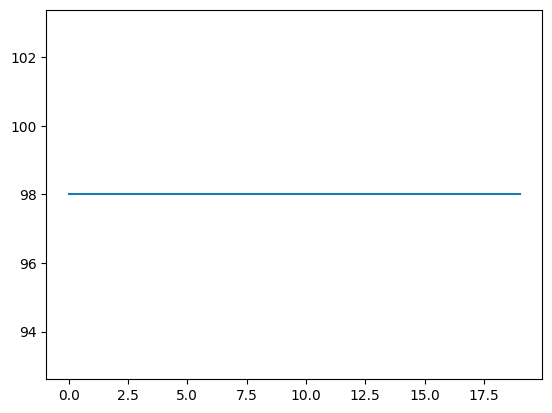

In [84]:
LL=[]
for item in input_X:
    LL.append(len(item))
plt.plot(LL)